In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [4]:
housetrain=pd.read_csv('house-train.csv')

In [5]:
housetrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housetest=pd.read_csv('house-test.csv')

In [7]:
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [8]:
print(housetrain.isnull().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [9]:
housetest['SalePrice']='test'

In [10]:
combineddf=pd.concat([housetrain,housetest],axis=0)

In [11]:
print(combineddf.shape)

(2919, 81)


In [12]:
combineddf.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice         object
Length: 81, dtype: object

In [13]:
numcols=combineddf.select_dtypes(include=np.number)
objcols=combineddf.select_dtypes(include=['object'])

In [14]:
numcols.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [15]:
objcols.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [16]:
print(numcols.shape)
print(objcols.shape)

(2919, 37)
(2919, 44)


In [17]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [18]:
objcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [19]:
nonecols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

In [20]:
for i in nonecols:
    objcols[i]=objcols[i].fillna('not available')

In [21]:
objcols.isnull().sum().sort_values(ascending=False)

GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
KitchenQual        1
SaleType           1
Exterior1st        1
Exterior2nd        1
Electrical         1
LotShape           0
FireplaceQu        0
LandContour        0
BldgType           0
Alley              0
PavedDrive         0
Fence              0
MiscFeature        0
SaleCondition      0
PoolQC             0
HeatingQC          0
CentralAir         0
HouseStyle         0
Heating            0
LotConfig          0
LandSlope          0
Neighborhood       0
Street             0
Condition1         0
Foundation         0
ExterCond          0
ExterQual          0
Condition2         0
RoofMatl           0
RoofStyle          0
SalePrice          0
dtype: int64

In [22]:
bsmtcols=['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1']

In [23]:
for i in bsmtcols:
    bsmtfreq=objcols[i].value_counts(dropna=False)
    print(bsmtfreq)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64


In [24]:
for i in objcols.columns:
    objcols[i]=objcols[i].fillna(objcols[i].value_counts().idxmax())

In [25]:
objcols.isnull().sum().sort_values(ascending=False)

MSZoning         0
Street           0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SalePrice        0
dtype: int64

In [26]:
for i in numcols:
    numcols[i]=numcols[i].fillna(numcols[i].median())

In [27]:
numcols.isnull().sum().sort_values(ascending=False)

Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [28]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [29]:
catgrycols=numcols[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']]

In [30]:
catgrycols['GarageYrBlt']=numcols.GarageYrBlt

In [31]:
numcols=numcols.drop(['OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','MoSold', 'YrSold'],axis=1)

In [32]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [33]:
numcols=numcols.drop('GarageYrBlt',axis=1)

In [34]:
print(objcols.shape)
print(numcols.shape)
print(catgrycols.shape)

(2919, 44)
(2919, 30)
(2919, 7)


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
numcols['Saleprice']=objcols.SalePrice

In [38]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'Saleprice'],
      dtype='object')

In [39]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [40]:
objcols=objcols.drop('SalePrice',axis=1)

In [41]:
objcolsdummy=objcols.apply(le.fit_transform)

In [42]:
combineddf=pd.concat([numcols,catgrycols,objcolsdummy],axis=1)

In [43]:
combineddf.head()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,...,1,1,4,4,2,3,4,4,8,4
1,2,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,...,1,1,4,4,2,3,4,4,8,4
2,3,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,...,1,1,4,4,2,3,4,4,8,4
3,4,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,...,5,2,4,4,2,3,4,4,8,0
4,5,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,...,1,1,4,4,2,3,4,4,8,4


In [44]:
combineddf=combineddf.drop('Id',axis=1)

In [45]:
combineddf.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,...,1,1,4,4,2,3,4,4,8,4
1,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,...,1,1,4,4,2,3,4,4,8,4
2,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,...,1,1,4,4,2,3,4,4,8,4
3,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,...,5,2,4,4,2,3,4,4,8,0
4,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,...,1,1,4,4,2,3,4,4,8,4


In [46]:
combineddf.Saleprice.tail()

1454    test
1455    test
1456    test
1457    test
1458    test
Name: Saleprice, dtype: object

In [47]:
housetraindf=combineddf[combineddf.Saleprice!='test']
housetestdf=combineddf[combineddf.Saleprice=='test']

In [48]:
housetraindf.Saleprice.dtypes

dtype('O')

In [49]:
housetraindf.Saleprice=pd.to_numeric(housetraindf.Saleprice)

In [50]:
housetestdf=housetestdf.drop('Saleprice',axis=1)

In [51]:
y=housetraindf.Saleprice

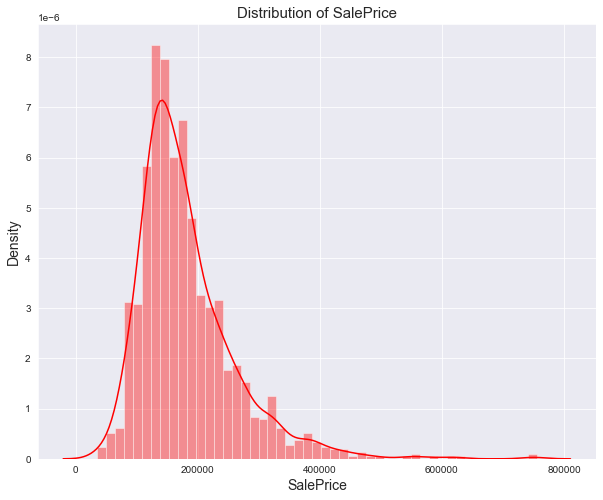

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.distplot(y,kde=True,color='red')
plt.title("Distribution of SalePrice",fontsize=15)
plt.xlabel('SalePrice',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

In [53]:
X=housetraindf.drop('Saleprice',axis=1)

In [54]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold',
       'YrSold', 'GarageYrBlt', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'K

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
regmodel=LinearRegression()

In [57]:
linmodel=regmodel.fit(X,y)

In [58]:
linmodel.score(X,y)

0.8545357896437559

In [59]:
linpredicit=linmodel.predict(X)

In [60]:
linpredicit

array([216175.4659985 , 200689.03783907, 219198.46253894, ...,
       246434.70668931, 150606.73367785, 160603.35990488])

In [61]:
resdiuals=y-linpredicit

In [62]:
resdiuals.head()
print(resdiuals.dtype)

float64


In [63]:
y.dtype

dtype('int64')

In [64]:
rmse=np.sqrt(np.mean(resdiuals**2))
print(rmse)

30288.810168965225


In [65]:
testpred=linmodel.predict(housetestdf)

In [66]:
testpred[:8]

array([107216.74953258, 157117.97328593, 166969.41007551, 183955.41088236,
       188983.31844405, 172580.29838373, 184158.95956767, 163065.79938665])

In [67]:
logy=np.log(y)

In [68]:
logy[:5]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: Saleprice, dtype: float64

In [69]:
logy.dtype

dtype('float64')

In [70]:
logyfit=linmodel.fit(X,logy)

In [71]:
logyfit.score(X,logy)

0.8878854874818258

In [72]:
logypredict=logyfit.predict(X)

In [73]:
logypredict[:6]

array([12.22989163, 12.2049298 , 12.2810953 , 12.00094758, 12.6037632 ,
       11.98802267])

In [74]:
pred1=np.exp(logypredict)

In [75]:
pred1[:4]

array([204820.98372642, 199771.56144535, 215581.71449464, 162909.08819313])

In [76]:
logpred=logyfit.predict(housetestdf)

In [77]:
predlog2=np.exp(logpred)

In [78]:
predlog2[:6]

array([116450.96663519, 156588.42332387, 165966.4181693 , 195641.9103168 ,
       186049.88018995, 171748.88172337])

In [79]:
res1=y-pred1

In [80]:
np.sqrt(np.mean(res1**2))

31804.053974061833

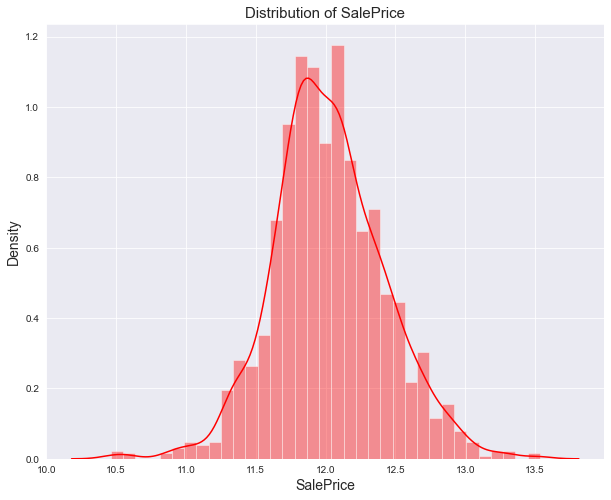

In [81]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.distplot(logy,kde=True,color='red')
plt.title("Distribution of SalePrice",fontsize=15)
plt.xlabel('SalePrice',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

In [82]:
sqrty=np.sqrt(y)

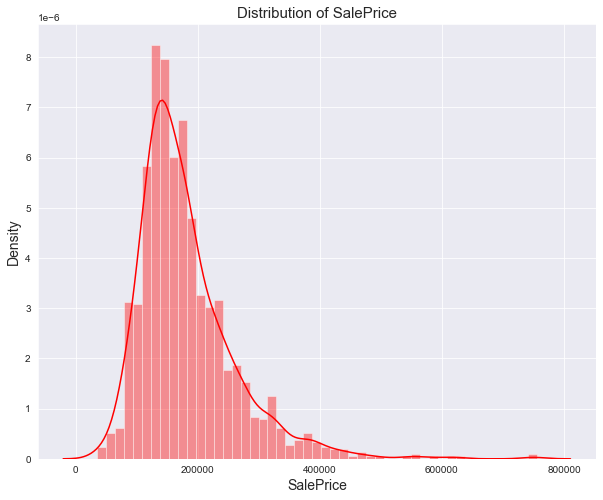

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.distplot(y,kde=True,color='red')
plt.title("Distribution of SalePrice",fontsize=15)
plt.xlabel('SalePrice',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

In [84]:
sqrtyfit=linmodel.fit(X,sqrty)

In [85]:
sqrtyfit.score(X,sqrty)

0.8859015114774657

In [86]:
sqrtypred=sqrtyfit.predict(X)

In [87]:
sqrtypred[:3]

array([458.67271499, 445.62068705, 466.42634799])

In [88]:
prd2=np.square(sqrtypred)

In [89]:
res2=y-prd2

In [90]:
np.sqrt(np.mean(res2**2))

29218.366387484006

In [91]:
sqrtestpred=sqrtyfit.predict(housetestdf)

In [92]:
testpredsqrt=np.square(sqrtestpred)

In [93]:
testpredsqrt[:6]

array([113887.89501604, 157454.67412151, 166827.08623287, 190134.88699206,
       187494.18707403, 172775.38698703])

In [94]:
pd.DataFrame(testpredsqrt).to_csv('housesqrpred.csv')

In [95]:
pd.DataFrame(pred1).to_csv('houselogpred.csv')